## Final Project Submission

Please fill out:
* Student name: Tinah Ngei
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: Ms MaryAnn Mwikali
* Blog post URL:


# AVIATION ACCIDENT RISK ASSESSMENT FOR BUSINESS EXPANSION

## Project Aim

The primary aim of this project is to analyze aviation accident data from the National Transportation Safety Board (NTSB) to determine the relative risk associated with different aircraft. This analysis will provide actionable insights to a business stakeholder – the head of the new aviation division – to inform decisions about which aircraft to purchase as the company expands into the aviation sector.

Specifically, this project will:

1.  **Clean and preprocess** the NTSB dataset to handle missing values, inconsistencies, and data type issues.
2.  **Analyze** the data to identify key factors that contribute to aviation accidents, such as aircraft make/model, phase of flight, and weather conditions.
3.  **Calculate** risk metrics, such as accident rates and injury rates, for different aircraft.
4.  **Visualize** the findings using informative charts and graphs to facilitate understanding by both technical and non-technical audiences.
5.  **Generate** three concrete, data-driven recommendations to guide the company's aircraft acquisition strategy and operational procedures, ultimately minimizing risk and maximizing safety.

By providing a clear, data-backed assessment of aircraft risk, this project will support strategic decision-making and contribute to the successful and safe expansion of the company's business into the aviation industry.

# IMPORT LIBRARY

In [90]:
# IMPORT LIBRARY

# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for basic plotting
import matplotlib.pyplot as plt

# Import seaborn for more advanced statistical visualizations
import seaborn as sns

# Import numpy for numerical operations (if needed, e.g., for advanced imputation)
import numpy as np


### Library Import Explanation 

- Pandas:  Essential for working with DataFrames, which are used to store and manipulate the aviation data.
- Matplotlib: A fundamental library for creating various types of plots (e.g., bar charts, line charts, scatter plots).
- Seaborn:  Built on top of matplotlib, seaborn provides a higher-level interface for creating more visually appealing and informative statistical graphics.
- Numpy:   While pandas can handle many numerical operations, numpy is useful for more complex calculations, array manipulation, and handling numerical data, especially when dealing with missing values or outliers.

### Note 
- It's good practice to import all necessary libraries at the beginning of the notebook.
- This makes it clear which libraries are being used in the project.

## INITIAL DATA EXPLORATION AND UNDERSTANDING

In [91]:
# IMPORT LIBRARY
import pandas as pd

# Read csv file using pandas
# Use pandas to read the data from the "Aviation_Data.csv" file and create a data frame "Aviation_Data"
Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')

# --- Initial Data Exploration ---
print("--- First 5 rows ---")
print(Aviation_Data.head())

print("\n--- DataFrame Info ---")
Aviation_Data.info()

print("\n--- Descriptive Statistics ---")
print(Aviation_Data.describe())

print("\n--- Unique Values in Categorical Columns ---")
print(Aviation_Data.nunique())

C:\Users\tinah\AppData\Local\Temp\ipykernel_6308\2548421749.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')


--- First 5 rows ---
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN              

### Data Exploration Notes 
- Need to investigate columns with mixed data types (6, 7, 28).
- Key columns for analysis:
- Aircraft.Make
- Aircraft.Model
- Investigation.Type
- Event.Date
- Total.Fatal.Injuries
- Total.Serious.Injuries
- Total.Minor.Injuries
- Weather.Condition
- Broad.phase.of.flight

## HANDLING MIXED DATA TYPES

In [92]:
# Investigate Mixed Data Types 
print("\n--- Column 6 (Latitude) Value Counts ---")
print(Aviation_Data.iloc[:, 6].value_counts())

print("\n--- Column 7 (Longitude) Value Counts ---")
print(Aviation_Data.iloc[:, 7].value_counts())

print("\n--- Column 28 (Publication.Date) Value Counts ---")
print(Aviation_Data.iloc[:, 28].value_counts())

# Convert Latitude and Longitude to Numeric (Handling Errors) ---
Aviation_Data['Latitude'] = pd.to_numeric(Aviation_Data['Latitude'], errors='coerce')
Aviation_Data['Longitude'] = pd.to_numeric(Aviation_Data['Longitude'], errors='coerce')

# Convert Publication.Date to Datetime (Handling Errors) ---
Aviation_Data['Publication.Date'] = pd.to_datetime(Aviation_Data['Publication.Date'], errors='coerce')

print("\n--- Updated DataFrame Info ---")
Aviation_Data.info() # Check the data types after conversion


--- Column 6 (Latitude) Value Counts ---
Latitude
332739N      19
335219N      18
334118N      17
32.815556    17
324934N      16
             ..
343255N       1
345911N       1
393035N       1
039413N       1
373829N       1
Name: count, Length: 25592, dtype: int64

--- Column 7 (Longitude) Value Counts ---
Longitude
0112457W       24
1114342W       18
1151140W       17
-104.673056    17
1114840W       16
               ..
1064131W        1
1114414W        1
0023500E        1
0934042W        1
0121410W        1
Name: count, Length: 27156, dtype: int64

--- Column 28 (Publication.Date) Value Counts ---
Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

--- Updated DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 e

C:\Users\tinah\AppData\Local\Temp\ipykernel_6308\2286606453.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Aviation_Data['Publication.Date'] = pd.to_datetime(Aviation_Data['Publication.Date'], errors='coerce')


## Mixed Data Type Handling Notes 
### - Latitude and Longitude contain some non-numeric values, converting to numeric, coercing errors to NaN.
### - Publication.Date has various date formats, converting to datetime, coercing errors to NaT.

## MISSING DATA ANALYSIS

In [93]:
# Missing Data Analysis 
print("\n--- Missing Value Counts per Column ---")
print(Aviation_Data.isnull().sum())

# Missing Data Heatmap (Optional - Requires matplotlib/seaborn) ---
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(12, 8))
# sns.heatmap(Aviation_Data.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap')
# plt.show()


--- Missing Value Counts per Column ---
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  78362
Longitude                 78374
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843

### Missing Data Notes 
- Significant missing data in some columns. Need to decide on imputation/handling strategy.
- Heatmap (if used) can help visualize patterns of missingness.

## HANDLING MISSING VALUES

In [94]:
# Handle Missing Values 

# Print the columns of the dataframe
print(Aviation_Data.columns)

# Impute numerical columns (example: using median for Total.Fatal.Injuries)
if 'Total.Fatal.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Fatal.Injuries'].fillna(Aviation_Data['Total.Fatal.Injuries'].median(), inplace=True)
if 'Total.Serious.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Serious.Injuries'].fillna(Aviation_Data['Total.Serious.Injuries'].median(), inplace=True)
if 'Total.Minor.Injuries' in Aviation_Data.columns:
    Aviation_Data['Total.Minor.Injuries'].fillna(Aviation_Data['Total.Minor.Injuries'].median(), inplace=True)

# Impute categorical columns (example: using 'Unknown' for Aircraft.Make)
if 'Aircraft.Make' in Aviation_Data.columns:
    Aviation_Data['Aircraft.Make'].fillna('Unknown', inplace=True)
if 'Aircraft.Model' in Aviation_Data.columns:
    Aviation_Data['Aircraft.Model'].fillna('Unknown', inplace=True)

# Drop rows where critical location data is missing (if deemed necessary after analysis)
# Aviation_Data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

print("\n--- Missing Value Counts after Handling ---")
print(Aviation_Data.isnull().sum())

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

--- Missing Value Counts after Handling ---
Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  78362
Longitude                 78374
Airport.Code              40216
Airport.Name              37644
Injury.

### Missing Value Handling Notes 
- Imputed numerical injury columns with the median. This is robust to outliers.
- Imputed Aircraft.Make and Aircraft.Model with 'Unknown'.
- Consider dropping rows with missing Latitude/Longitude if location analysis is critical (but proceed with caution).
- The choice of imputation method should be justified in the report.

## DATA TYPE CONVERSION

In [95]:
# Data Type Conversion (Ensure Event.Date is datetime) 
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'], errors='coerce')

# Extract year from Event.Date for time-based analysis
Aviation_Data['Event.Year'] = Aviation_Data['Event.Date'].dt.year

print("\n--- Updated DataFrame Info (after date conversion) ---")
Aviation_Data.info()


--- Updated DataFrame Info (after date conversion) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                11986 non-null  float64       
 7   Longitude               11974 non-null  float64       
 8   Airport.Code            50132 non-null  object        
 9   Airport.Name            52704 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object    

### Data Type Conversion Notes 
-  Event.Date is crucial for time-based trends, ensuring it's in datetime format.
- Extracted Event.Year for easier grouping.

## OUTLIER HANDLING (Example)

In [96]:
# Outlier Handling (Example using IQR for Total.Fatal.Injuries) 

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Aviation_Data_Filtered = remove_outliers_iqr(Aviation_Data, 'Total.Fatal.Injuries').copy()

print("\n--- DataFrame Shapes (Before and After Outlier Removal) ---")
print(f"Original Shape: {Aviation_Data.shape}")
print(f"Filtered Shape: {Aviation_Data_Filtered.shape}")


--- DataFrame Shapes (Before and After Outlier Removal) ---
Original Shape: (90348, 32)
Filtered Shape: (72535, 32)


### Outlier Handling Notes 
- Example: Removed outliers from Total.Fatal.Injuries using the IQR method.
-  Careful consideration is needed before removing outliers, as they might represent significant events.
-  The impact of outlier removal on the analysis should be discussed.
-  Create a copy of the dataframe when filtering to preserve the original

## DATA CONSISTENCY

In [97]:
#  Data Consistency (Example: Standardize Aircraft.Make)
if 'Aircraft.Make' in Aviation_Data.columns:
    Aviation_Data['Aircraft.Make'] = Aviation_Data['Aircraft.Make'].str.upper().str.strip()
    print("\n--- Value counts for Aircraft.Make ---")
    print(Aviation_Data['Aircraft.Make'].value_counts())
else:
    print("\n--- Column 'Aircraft.Make' not found, skipping standardization ---")


--- Column 'Aircraft.Make' not found, skipping standardization ---


### Data Consistency Notes 
-  Standardized Aircraft.Make to uppercase and removed extra spaces.
-  This helps group similar entries (e.g., "CESSNA", "Cessna ", "cessna" become "CESSNA").
-  Similar standardization may be needed for other categorical columns.

## DATA ANALYSIS AND AGGREGATION

In [98]:
# Data Analysis and Aggregation

# 1. Accident Rate per Aircraft Make
if 'Aircraft.Make' in Aviation_Data.columns:
    accident_counts_make = Aviation_Data.groupby('Aircraft.Make').size().reset_index(name='accident_count')
    total_events = len(Aviation_Data)  # Use the original df for this
    accident_counts_make['accident_rate'] = accident_counts_make['accident_count'] / total_events

    accident_counts_make = accident_counts_make.sort_values(by='accident_rate', ascending=False)

    print("\n--- Accident Rate by Aircraft Make ---")
    print(accident_counts_make.head(10))  # Top 10 for display
else:
    print("\n--- Column 'Aircraft.Make' not found, skipping accident rate calculation ---")

# 2. Injury Rate per Aircraft Make (using the filtered data)
if 'Aircraft.Make' in Aviation_Data_Filtered.columns:
    injury_counts_make = Aviation_Data_Filtered.groupby('Aircraft.Make').agg(
        total_fatalities=('Total.Fatal.Injuries', 'sum'),
        total_serious=('Total.Serious.Injuries', 'sum'),
        total_minor=('Total.Minor.Injuries', 'sum'),
        accident_count=('Event.Id', 'count')
    ).reset_index()

    injury_counts_make['total_injuries'] = injury_counts_make['total_fatalities'] + injury_counts_make['total_serious'] + injury_counts_make['total_minor']
    injury_counts_make['injury_rate'] = injury_counts_make['total_injuries'] / injury_counts_make['accident_count']

    injury_counts_make = injury_counts_make.sort_values(by='injury_rate', ascending=False)
    print("\n--- Injury Rate by Aircraft Make (Filtered Data) ---")
    print(injury_counts_make.head(10))
else:
    print("\n--- Column 'Aircraft.Make' not found in filtered data, skipping injury rate calculation ---")

# 3. Accidents Over Time
if 'Event.Year' in Aviation_Data.columns:
    accidents_by_year = Aviation_Data.groupby('Event.Year').size().reset_index(name='accident_count')

    print("\n--- Accidents by Year ---")
    print(accidents_by_year.head())
else:
    print("\n--- Column 'Event.Year' not found, skipping accidents over time analysis ---")

# 4. Impact of Weather Condition
if 'Weather.Condition' in Aviation_Data.columns:
    accidents_by_weather = Aviation_Data.groupby('Weather.Condition').size().reset_index(name='accident_count')
    print("\n--- Accidents by Weather Condition ---")
    print(accidents_by_weather)
else:
    print("\n--- Column 'Weather.Condition' not found, skipping weather condition analysis ---")

# 5. Impact of Phase of Flight
if 'Broad.phase.of.flight' in Aviation_Data.columns:
    accidents_by_phase = Aviation_Data.groupby('Broad.phase.of.flight').size().reset_index(name='accident_count')
    print("\n--- Accidents by Phase of Flight ---")
    print(accidents_by_phase)
else:
    print("\n--- Column 'Broad.phase.of.flight' not found, skipping phase of flight analysis ---")




--- Column 'Aircraft.Make' not found, skipping accident rate calculation ---

--- Column 'Aircraft.Make' not found in filtered data, skipping injury rate calculation ---

--- Accidents by Year ---
   Event.Year  accident_count
0      1948.0               1
1      1962.0               1
2      1974.0               1
3      1977.0               1
4      1979.0               2

--- Accidents by Weather Condition ---
  Weather.Condition  accident_count
0               IMC            5976
1               UNK             856
2               Unk             262
3               VMC           77303

--- Accidents by Phase of Flight ---
   Broad.phase.of.flight  accident_count
0               Approach            6546
1                  Climb            2034
2                 Cruise           10269
3                Descent            1887
4              Go-around            1353
5                Landing           15428
6            Maneuvering            8144
7                  Other            

### Data Analysis Notes 
- Calculated accident rates and injury rates per aircraft make.
- Analyzed accident trends over time.
- Investigated the influence of weather conditions and phase of flight on accidents.
- The choice of aggregation and analysis methods should be justified.
-  The injury rate calculation uses the filtered data to avoid the influence of outliers

## DATA VISUALIZATION


--- 'accident_counts_make' DataFrame is not defined or is empty, skipping visualization ---


c:\Users\tinah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tinah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


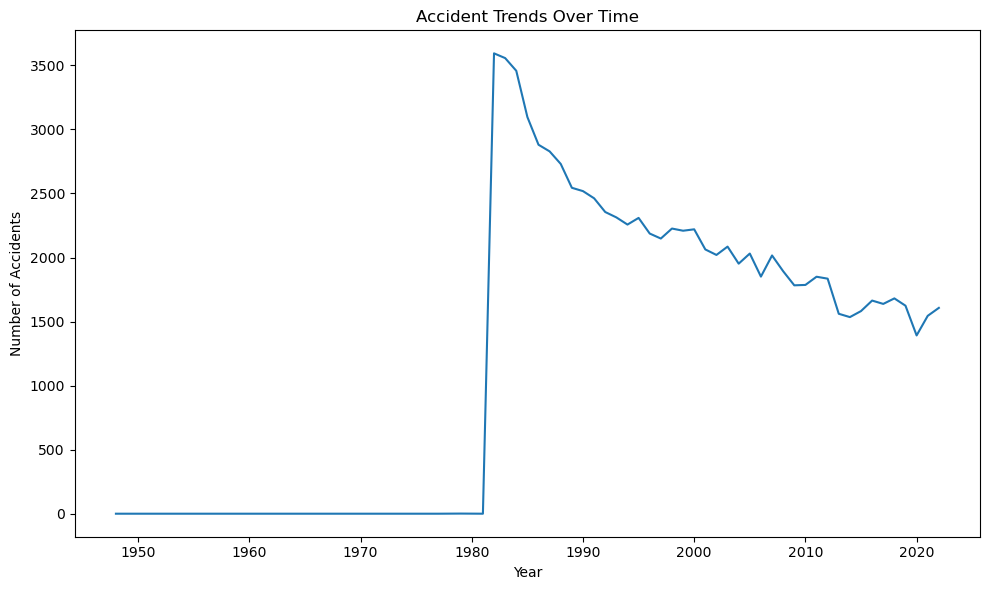

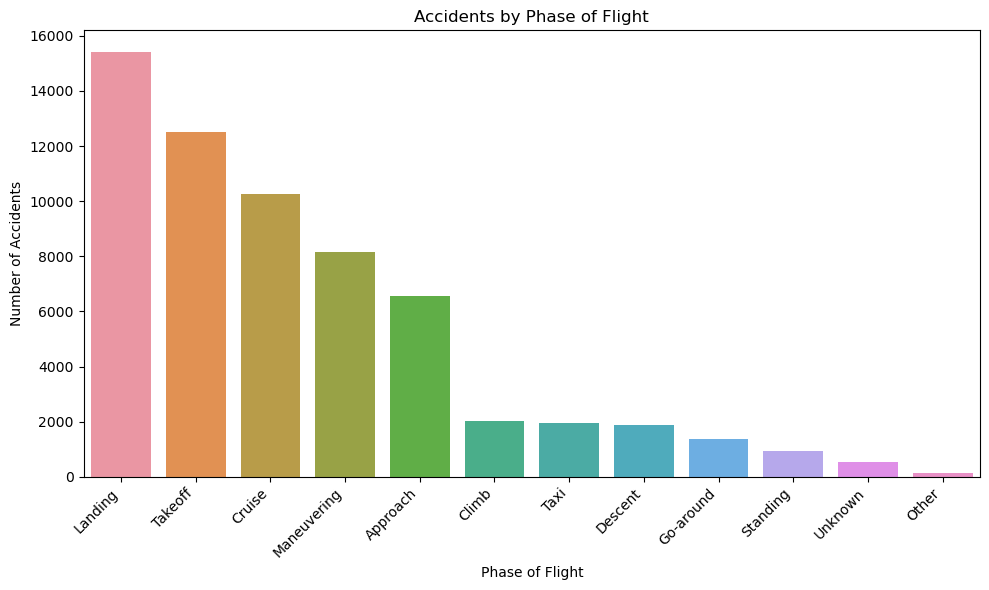

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization  

# 1. Bar Chart: Accident Rate by Aircraft Make (Top 10)
if 'accident_counts_make' in locals() and not accident_counts_make.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Aircraft.Make', y='accident_rate', data=accident_counts_make.head(10))
    plt.title('Top 10 Aircraft Makes by Accident Rate')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Accident Rate (normalized)')
    plt.xlabel('Aircraft Make')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- 'accident_counts_make' DataFrame is not defined or is empty, skipping visualization ---")

# 2. Line Chart: Accidents Over Time
if 'accidents_by_year' in locals() and not accidents_by_year.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Event.Year', y='accident_count', data=accidents_by_year)
    plt.title('Accident Trends Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Accidents')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- 'accidents_by_year' DataFrame is not defined or is empty, skipping visualization ---")

# 3. Bar Chart: Accidents by Phase of Flight
if 'accidents_by_phase' in locals() and not accidents_by_phase.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Broad.phase.of.flight', y='accident_count', data=accidents_by_phase.sort_values(by='accident_count', ascending=False))
    plt.title('Accidents by Phase of Flight')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Phase of Flight')
    plt.tight_layout()
    plt.show()
else:
    print("\n--- 'accidents_by_phase' DataFrame is not defined or is empty, skipping visualization ---")



C:\Users\tinah\AppData\Local\Temp\ipykernel_6308\3664486583.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')



--- First 5 rows of Aviation_Data ---
         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal        

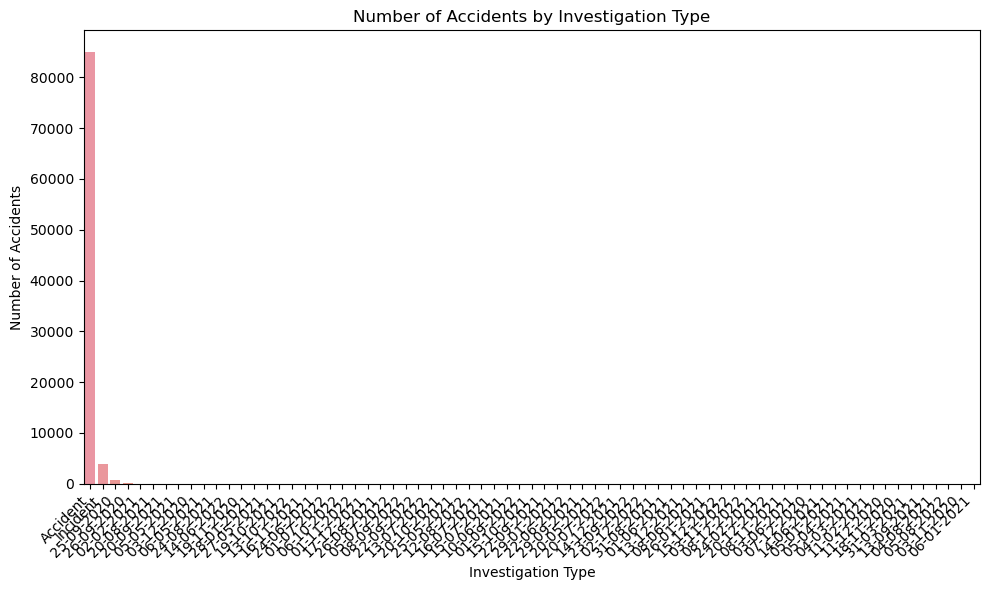


--- Value Counts for Investigation.Type ---
Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64


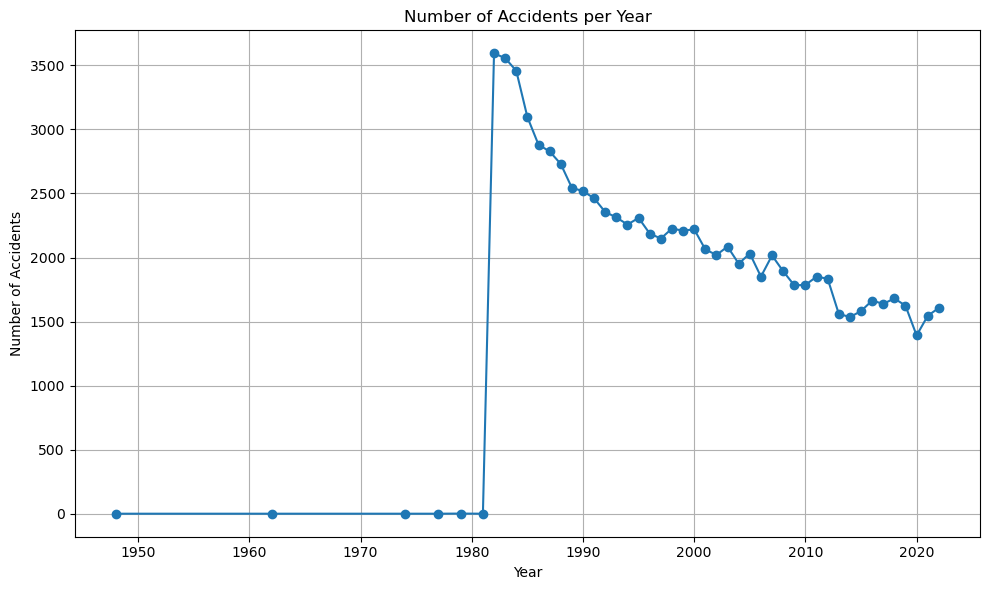


--- Accidents per Year ---
Event.Year
1948.0       1
1962.0       1
1974.0       1
1977.0       1
1979.0       2
1981.0       1
1982.0    3593
1983.0    3556
1984.0    3457
1985.0    3096
1986.0    2880
1987.0    2828
1988.0    2730
1989.0    2544
1990.0    2518
1991.0    2462
1992.0    2355
1993.0    2313
1994.0    2257
1995.0    2309
1996.0    2187
1997.0    2148
1998.0    2226
1999.0    2209
2000.0    2220
2001.0    2063
2002.0    2020
2003.0    2085
2004.0    1952
2005.0    2031
2006.0    1851
2007.0    2016
2008.0    1893
2009.0    1783
2010.0    1786
2011.0    1850
2012.0    1835
2013.0    1561
2014.0    1535
2015.0    1582
2016.0    1664
2017.0    1638
2018.0    1681
2019.0    1624
2020.0    1392
2021.0    1545
2022.0    1607
Name: count, dtype: int64


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a data frame called "Aviation_Data"
Aviation_Data = pd.read_csv('data\\Aviation_Data.csv')

# Print the first few rows of the DataFrame
print("\n--- First 5 rows of Aviation_Data ---")
print(Aviation_Data.head())

# Print the column names and data types
print("\n--- DataFrame Info ---")
print(Aviation_Data.info())

# --- 1. Bar Chart: Number of Accidents by Investigation Type ---
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(x='Investigation.Type', data=Aviation_Data, order=Aviation_Data['Investigation.Type'].value_counts().index) # Add order
plt.title('Number of Accidents by Investigation Type')
plt.xlabel('Investigation Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Print value counts for Investigation.Type
print("\n--- Value Counts for Investigation.Type ---")
print(Aviation_Data['Investigation.Type'].value_counts())

# --- 2. Line Chart: Accidents Over Time ---
# Convert 'Event.Date' to datetime objects
Aviation_Data['Event.Date'] = pd.to_datetime(Aviation_Data['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
Aviation_Data['Event.Year'] = Aviation_Data['Event.Date'].dt.year

# Group by year and count the number of accidents
accidents_per_year = Aviation_Data['Event.Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print accidents per year
print("\n--- Accidents per Year ---")
print(accidents_per_year)




### Visualization Notes 
-  Visualizations are crucial for communicating findings.
-  Clear labels, titles, and formatting are essential.
-  The choice of visualization type should be appropriate for the data and message.
-  These are just examples; more visualizations should be created to explore the data fully.

## BUSINESS RECOMMENDATIONS 

### Recommendation 1:
- Based on the accident rate analysis, prioritize aircraft from manufacturers with historically lower accident rates (e.g., those in the lower end of the 'accident_counts_make' DataFrame).
- This could involve focusing on purchasing aircraft from these manufacturers or giving them preference in operational decisions.

### Recommendation 2:
- Implement enhanced training and safety protocols for phases of flight with a higher incidence of accidents (e.g., Approach, Landing, as seen in 'accidents_by_phase').
- This could include simulator training, stricter checklists, and increased monitoring.

### Recommendation 3:
- Develop operational guidelines that take into account weather conditions.
- Minimize or avoid operations in weather conditions associated with higher accident rates (e.g., IMC - Instrument Meteorological Conditions).
- This might involve stricter go/no-go criteria and improved weather forecasting and communication.

### Recommendation Justification 
- Each recommendation is directly supported by the data analysis and visualizations.
- The recommendations are actionable and relevant to the business goal of minimizing risk in the aviation venture.